In [1]:
# Cloning the project repository
# !git clone https://github.com/Felipe-Cancio/Dinamic-Draft-Reading.git

In [2]:
# ANOTAÇÕES
'''
# Formas de pegar os pontos das bounding boxes do tensor
results[0].boxes.xyxy[0,0].int().item()  - Pytorch function sem arredondar
results[0].boxes.xyxy[0,0].round().int().item() - Pytorch function arredondando
round(results[0].boxes.xyxy[0,0].item()) - Python round function arredondando

'''

'\n# Formas de pegar os pontos das bounding boxes do tensor\nresults[0].boxes.xyxy[0,0].int().item()  - Pytorch function sem arredondar\nresults[0].boxes.xyxy[0,0].round().int().item() - Pytorch function arredondando\nround(results[0].boxes.xyxy[0,0].item()) - Python round function arredondando\n\n'

In [3]:
# Libs
from ultralytics import YOLO
from matplotlib import pyplot as plt
import easyocr
import cv2 as cv
import os

In [4]:
# VISUALIZAR IMAGEM
def displayImg(img, title='', cmap=None):
  plt.figure(figsize=(25,25))
  plt.subplot(122),plt.imshow(img, cmap=cmap)
  plt.title(title), plt.xticks([]), plt.yticks([])
  plt.show()

# VISUALIZAR A COMPARAÇÃO DE DUAS IMAGENS
def compareImgs(image1, image2, title1, title2, cmap=None):
  plt.figure(figsize=(22,22))
  plt.subplot(121),plt.imshow(image1, cmap=cmap)
  plt.title(title2), plt.xticks([]), plt.yticks([])
  plt.figure(figsize=(22,22))
  plt.subplot(122),plt.imshow(image2, cmap=cmap)
  plt.title(title2), plt.xticks([]), plt.yticks([])
  plt.show()

In [12]:
# Função p/ extratir marcas de calado da imagem
def extractBoxes(img, results):
  # Lista que irá conter as imagens das marcas de calado cortadas
  draftMarksImgs = list()
  # Iterando a lista de bounding boxes
  for i, box in enumerate(results[0].boxes.xyxy):
    x1, y1, x2, y2 = [point.int().item() for point in box]    # Extraindo os pontos de cada bounding box
    draftMarksImgs.append(img[y1:y2, x1:x2])                   # Cortando as bounding boxes da imagem
    dmValue = reader.recognize(img[y1:y2, x1:x2], allowlist="123456789M", detail=0)[0]
    cv.putText(img, str(i), (x2 + 50, y2), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1, cv.LINE_AA) # (DEBUG)
  # displayImg(bbimg)                                          # Visualizando a imagem com as bounding boxes (DEBUG)
  # bbimg = cv.rectangle(img,(x1,y1),(x2,y2),(0,255,0),1)      # Desenhando a bounding box na imagem (DEBUG)
  # Retornando as imagens cortadas das marcas de calado detectadas
  return draftMarksImgs

# Função p/ classificar o valor das marcas de calado 
def recognMarks(img, draftMarksImgs):
  # Lista que irá conter os valores das marcas de calado detectadas
  dmValues = list()
  # Iterando a lista das imagens das marcas de calado
  for draftMarkImg in draftMarksImgs:
    dmValue = reader.recognize(draftMarkImg, allowlist="123456789M", detail=0)[0]
    dmValues.append(dmValue)
  return dmValues

# Função p/ classificar o valor das marcas de calado 
def recognMarks2():
  # Lista que irá conter os valores das marcas de calado detectadas
  dmValues = list()
  draftMarksImgs = os.listdir('runs/detect/predict2/crops/DM')   # Caminhos das imagens das marcas de calado cortadas YOLO
  # Iterando a lista das imagens das marcas de calado
  for draftMarkImg in draftMarksImgs:
    dmValue = reader.recognize('runs/detect/predict2/crops/DM/' + draftMarkImg, allowlist="123456789M", detail=0)[0]
    dmValues.append(dmValue)
  return dmValues

# Função p/ ordernar as boundig boxes detectadas (baixo p/ cima)
def sortBoxes(results):
  pass

In [21]:
model = YOLO('Draft_Marks_Detect_YOLO_v3.pt')  # Carregando o modelo de detecção na memória
reader = easyocr.Reader(['en'], gpu=False)     # Carregando o modelo de OCR na memória

Using CPU. Note: This module is much faster with a GPU.


In [24]:
pred_id = ''
results = model.predict('1.jpg', save=True, save_crop=True)   # Detectando as marcas de calado na imagem
# results


image 1/1 C:\Users\canci\Documents\II Hackathon Softex-IFMA (AQUADEPTH)\Dinamic-Draft-Reading\YOLO_OCR Approach\Notebooks\1.jpg: 640x640 11 DMs, 247.0ms
Speed: 5.0ms preprocess, 247.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict


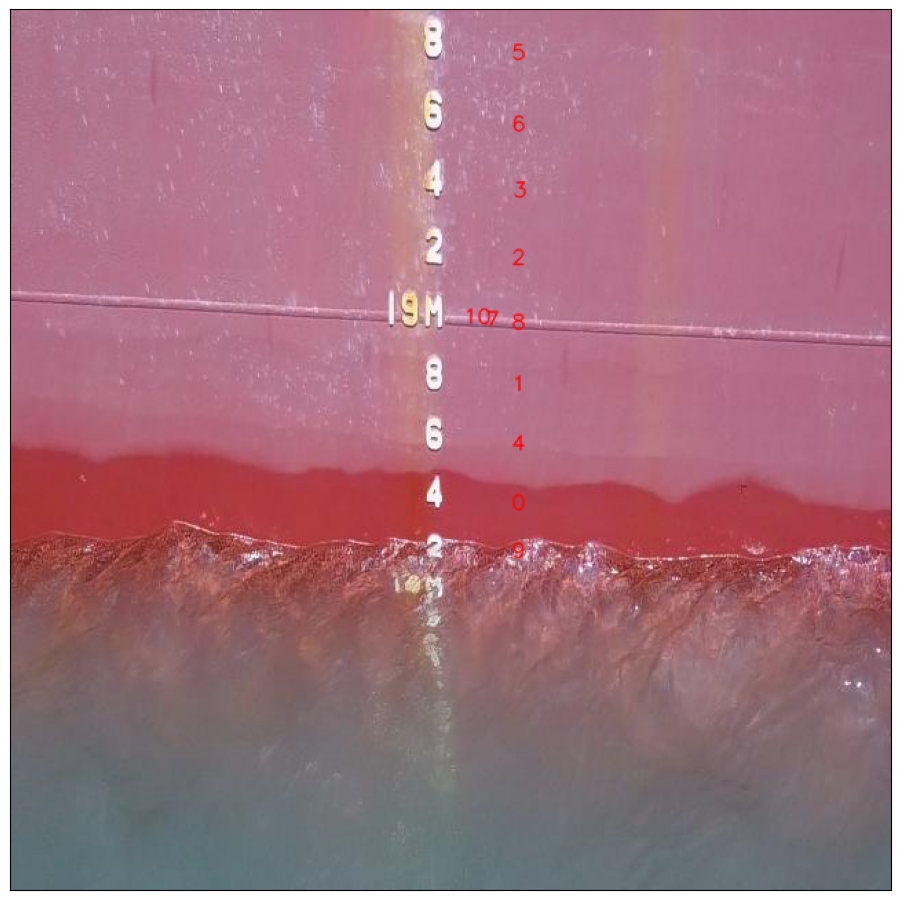

In [25]:
img = cv.imread("1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# bb1 = img[y1:y2, x1:x2]
dm = extractBoxes(img, results)
# recognMarks(img, dm)
displayImg(img)
# reader.recognize(dm[5])

In [18]:
# print(os.listdir('runs/detect/predict2/crops/DM'))
# recognMarks2()
a = list(zip(os.listdir('runs/detect/predict2/crops/DM'),recognMarks2()))
# next(os.walk('runs/detect/predict2/crops/DM/'), (None, None, []))[2]  # [] if no file